<a href="https://colab.research.google.com/github/Nhan2014/Nhan20146382/blob/main/AI_W6_10_3_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 21.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=bfefa6a0ece6aeb7469476d630f2827d79503353f8c399e0ca43fb6e1ac926ef
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

In [ ]:
sp= ctrl.Antecedent(np.arange(18,27,1),'sp')
val_sensor=ctrl.Antecedent(np.arange(-5,105,1),'val_sensor')
pwm=ctrl.Consequent(np.arange(0,255,1),'pwm')
#hz=ctrl.Consequent(np.arange(0,60,1),'hz')
sp['Cold']=fuzz.trimf(sp.universe,[18,18,21])
sp['cool']=fuzz.trimf(sp.universe,[18,21,24])
sp['Normal']=fuzz.trimf(sp.universe,[21,24,27])
sp['Hot']=fuzz.trimf(sp.universe,[24,27,27])
val_sensor['Freeze']=fuzz.trimf(val_sensor.universe,[-5,-5,31])
val_sensor['Cold']=fuzz.trimf(val_sensor.universe,[-5,31,67])
val_sensor['Hot']=fuzz.trimf(val_sensor.universe,[31,67,105])
val_sensor['Boiling']=fuzz.trimf(val_sensor.universe,[67,105,105])
pwm['Lowest']=fuzz.trimf(pwm.universe,[0,0,85])
pwm['Medium']=fuzz.trimf(pwm.universe,[0,85,170])
pwm['Medium_fast']=fuzz.trimf(pwm.universe,[85,170,255])
pwm['Fastest']=fuzz.trimf(pwm.universe,[170,255,255])
hz['Min']=fuzz.trimf(hz.universe,[0,0,20])
hz['Medium']=fuzz.trimf(hz.universe,[0,20,40])
hz['more_medium']=fuzz.trimf(hz.universe,[20,40,60])
hz['Max']=fuzz.trimf(hz.universe,[40,60,60])

In [ ]:
rule1=ctrl.Rule(sp['Cold']& val_sensor['Freeze'], pwm['Lowest'] )# hz['Min']) 
rule2=ctrl.Rule(sp['Cold']& val_sensor['Cold'], pwm['Lowest'] )#& hz['Min'])
rule3=ctrl.Rule(sp['Cold']& val_sensor['Hot'], pwm['Medium_fast'])# & hz['more_medium'])
rule4=ctrl.Rule(sp['Cold']& val_sensor['Boiling'], pwm['Fastest'] )#& hz['Max'])

rule5=ctrl.Rule(sp['cool']& val_sensor['Freeze'], pwm['Lowest'])# & hz['Min'])
rule6=ctrl.Rule(sp['cool']& val_sensor['Cold'], pwm['Medium'])# & hz['Medium'])
rule7=ctrl.Rule(sp['cool']& val_sensor['Hot'], pwm['Medium_fast'])# & hz['more_medium'])
rule8=ctrl.Rule(sp['cool']& val_sensor['Boiling'], pwm['Fastest'])# & hz['Max'])

rule9=ctrl.Rule(sp['Normal']& val_sensor['Freeze'], pwm['Medium'] )#& hz['Medium'])
rule10=ctrl.Rule(sp['Normal']& val_sensor['Cold'], pwm['Lowest'])# & hz['Min'])
rule11=ctrl.Rule(sp['Normal']& val_sensor['Hot'], pwm['Medium_fast'])# & hz['more_medium'])
rule12=ctrl.Rule(sp['Normal']& val_sensor['Boiling'], pwm['Medium_fast'])# & hz['more_medium'])

rule13=ctrl.Rule(sp['Hot']& val_sensor['Freeze'], pwm['Lowest'])# & hz['Min'])
rule14=ctrl.Rule(sp['Hot']& val_sensor['Cold'], pwm['Lowest'])# & hz['Min'])
rule15=ctrl.Rule(sp['Hot']& val_sensor['Hot'], pwm['Medium'])# & hz['Medium'])
rule16=ctrl.Rule(sp['Hot']& val_sensor['Boiling'], pwm['Medium'])# & hz['Medium'])

66.11092217652626


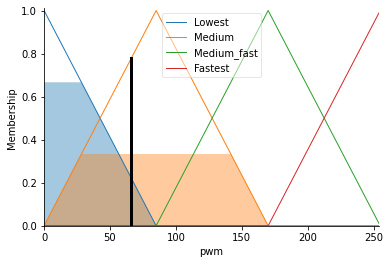

In [ ]:
pwm_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16])
pwmi=ctrl.ControlSystemSimulation(pwm_ctrl)
pwmi.input['sp'] = 27
pwmi.input['val_sensor'] = -5
pwmi.compute()
print(pwmi.output['pwm'])
pwm.view(sim=pwmi)

In [ ]:
left= ctrl.Antecedent(np.arange(18,27,1),'left')
cen=ctrl.Antecedent(np.arange(-5,105,1),'cen')
rig=ctrl.Antecedent(np.arange(-5,105,1),'cen')
lc=ctrl.Consequent(np.arange(0,255,1),'lc')
rc=ctrl.Consequent(np.arange(0,255,1),'rc')
pwm=ctrl.Consequent(np.arange(0,255,1),'pwm')

left['Nl']=fuzz.trimf(left.universe,[0,0,0.75])
left['Ml']=fuzz.trimf(left.universe,[0,0.75,1.5])
left['Fl']=fuzz.trimf(left.universe,[0.75,1.5,1.5])

cen['Nc']=fuzz.trimf(cen.universe,[0,0,0.75])
cen['Mc']=fuzz.trimf(cen.universe,[0,0.75,1.5])
cen['Fc']=fuzz.trimf(cen.universe,[0.75,1.5,1.5])

rig['Nr']=fuzz.trimf(rig.universe,[0,0,0.75])
rig['Mr']=fuzz.trimf(rig.universe,[0,0.75,1.5])
rig['Fr']=fuzz.trimf(rig.universe,[0.75,1.5,1.5])

lc['Sl']=fuzz.trimf(lc.universe,[0,0,45])
lc['Nl']=fuzz.trimf(lc.universe,[0,45,90])
lc['Bl']=fuzz.trimf(lc.universe,[45,90,90])

rc['Sr']=fuzz.trimf(rc.universe,[0,0,45])
rc['Nr']=fuzz.trimf(rc.universe,[0,45,90])
rc['Br']=fuzz.trimf(rc.universe,[45,90,90])

pwm['L1']=fuzz.trimf(pwm.universe,[0,0,177])
pwm['M1']=fuzz.trimf(pwm.universe,[0,177,255])
pwm['H1']=fuzz.trimf(pwm.universe,[177,255,255])



In [ ]:
#lc
rule1=ctrl.Rule(left['Nl']&cen['Nc'], pwm['L1'])
rule1=ctrl.Rule(left['Nl']&cen['Mc'], pwm['M1'])
rule1=ctrl.Rule(left['Nl']&cen['Fc'], pwm['L1'])

rule1=ctrl.Rule(left['Ml']&cen['Nl'], pwm['L1'])
rule1=ctrl.Rule(left['Ml']&cen['Mc'], pwm['L1'])
rule1=ctrl.Rule(left['Ml']&cen['Fc'], pwm['L1'])

rule1=ctrl.Rule(left['Fl']&cen['Nl'], pwm['L1'])
rule1=ctrl.Rule(left['Fl']&cen['Mc'], pwm['L1'])
rule1=ctrl.Rule(left['Fl']&cen['Fc'], pwm['L1'])